# Stat 133 Homework 7

In [27]:
library(DataComputing)
library(repr)

options(repr.plot.width=6.5, repr.plot.height=5)

In [4]:
Stations <- mosaic::read.file("http://tiny.cc/dcf/DC-Stations.csv")
data_site <- "http://tiny.cc/dcf/2014-Q4-Trips-History-Data-Small.rds" 
Trips <- readRDS(gzcon(url(data_site)))

Reading data with read.csv()


In [7]:
head(Trips)

,duration,sdate,sstation,edate,estation,bikeno,client
344758,0h 9m 15s,2014-11-06 16:26:00,15th & L St NW,2014-11-06 16:35:00,15th & L St NW,W00169,Registered
113251,0h 47m 21s,2014-10-12 11:30:00,3rd & D St SE,2014-10-12 12:17:00,Jefferson Dr & 14th St SW,W01482,Registered
633756,2h 46m 22s,2014-12-27 14:24:00,10th & E St NW,2014-12-27 17:10:00,10th & E St NW,W21346,Casual
466862,0h 15m 15s,2014-11-23 16:42:00,4th & M St SW,2014-11-23 16:57:00,5th & K St NW,W00647,Casual
474332,0h 18m 33s,2014-11-24 17:29:00,1st & Washington Hospital Center NW,2014-11-24 17:47:00,Columbus Circle / Union Station,W21580,Registered
581597,0h 2m 36s,2014-12-15 13:11:00,11th & Kenyon St NW,2014-12-15 13:14:00,Park Rd & Holmead Pl NW,W21286,Registered


## Time of the Day
### 1.

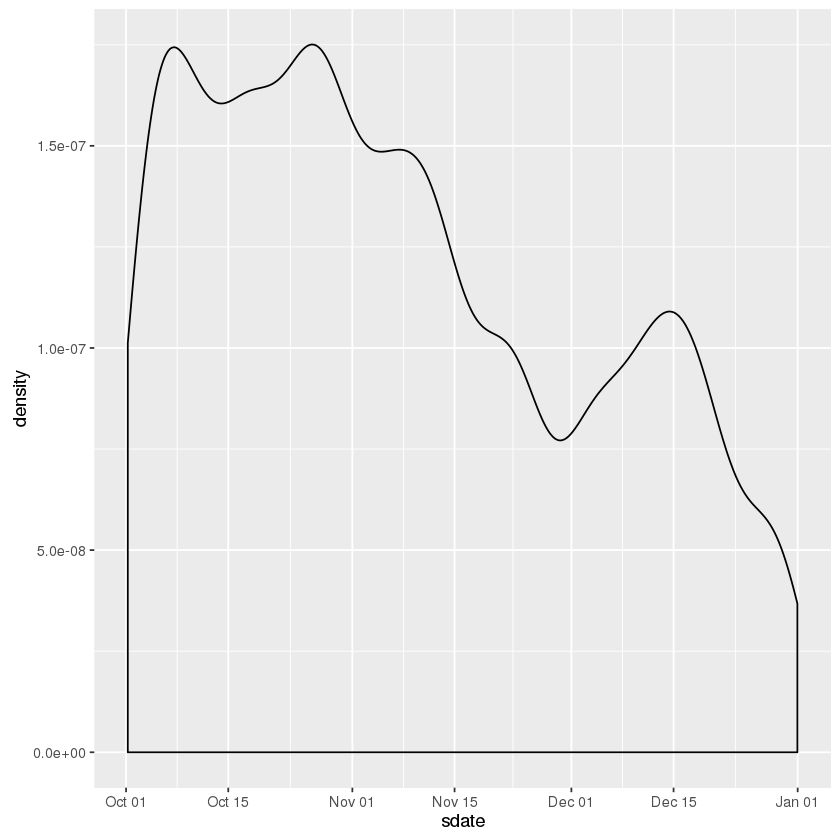

In [6]:
Trips %>% 
    ggplot(aes(x = sdate)) + 
    geom_density()

### 2.

This is certainly just a kernel density estimation for the variable sdate

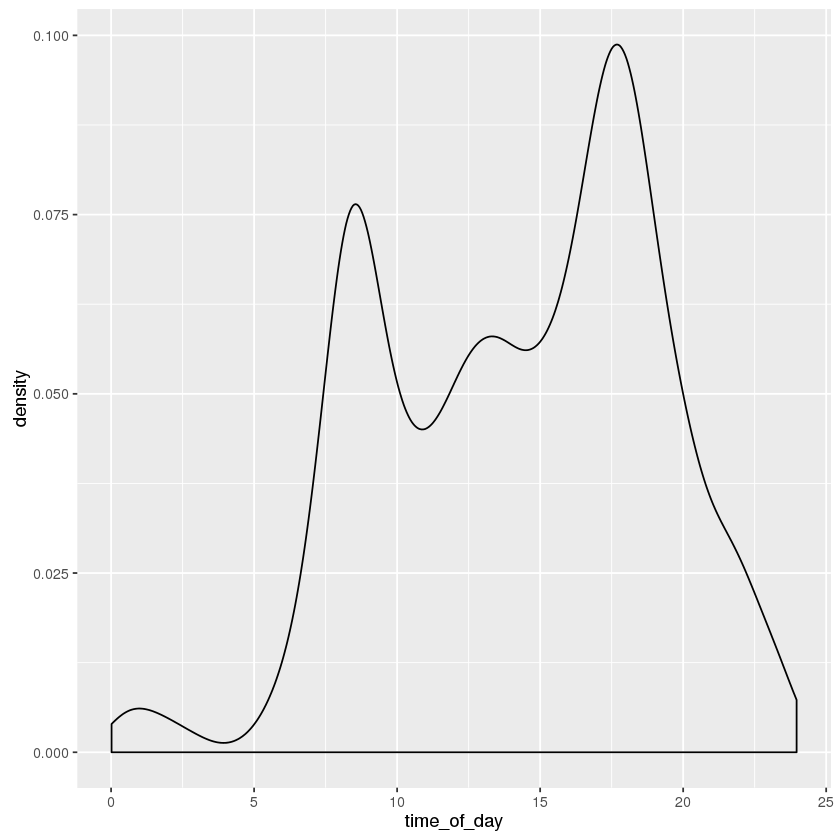

In [9]:
Trips %>% 
    mutate(time_of_day = lubridate::hour(sdate) + lubridate::minute(sdate) / 60) %>%
    ggplot(aes(x=time_of_day)) +
        geom_density()

### 3.

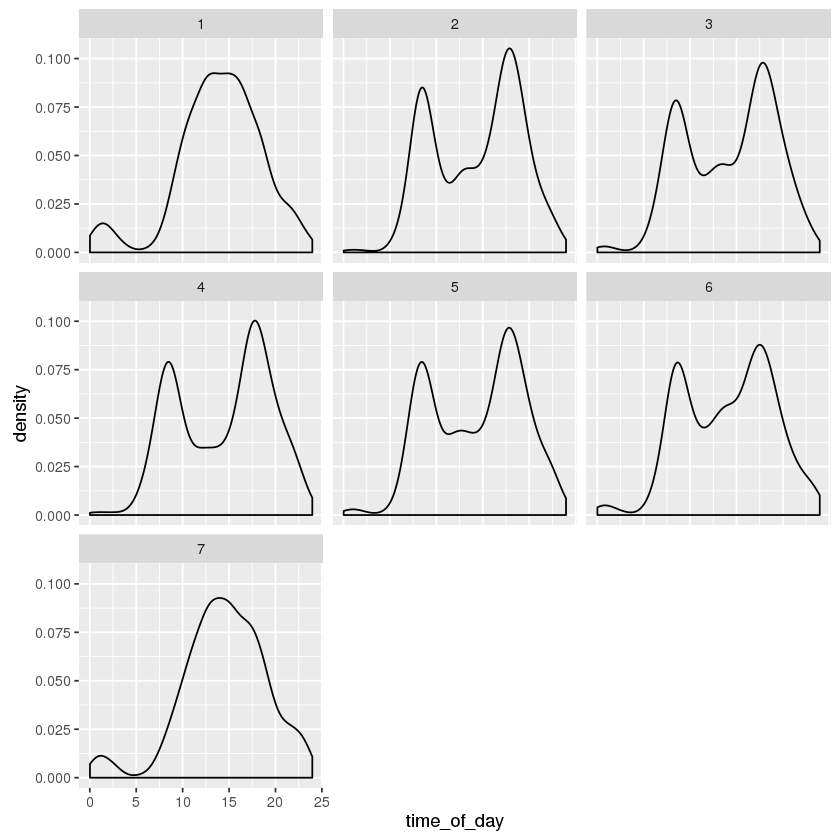

In [19]:
Trips %>% 
    mutate(
        time_of_day = lubridate::hour(sdate) + lubridate::minute(sdate) / 60,
        day_of_week = lubridate::wday(sdate)
    ) %>%
    ggplot(aes(x=time_of_day)) +
        geom_density() +
        facet_wrap(~day_of_week)

### 4.

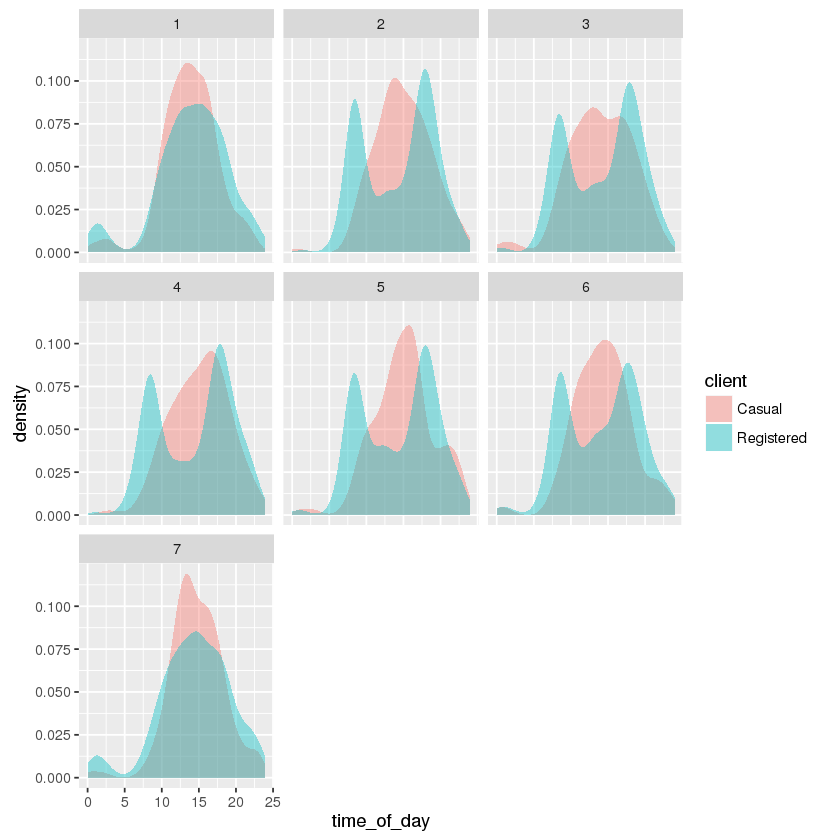

In [23]:
Trips %>% 
    mutate(
        time_of_day = lubridate::hour(sdate) + lubridate::minute(sdate) / 60,
        day_of_week = lubridate::wday(sdate)
    ) %>%
    ggplot(aes(x=time_of_day)) +
        geom_density(aes(fill=client), alpha=0.4, color=NA) +
        facet_wrap(~day_of_week)

### 5.

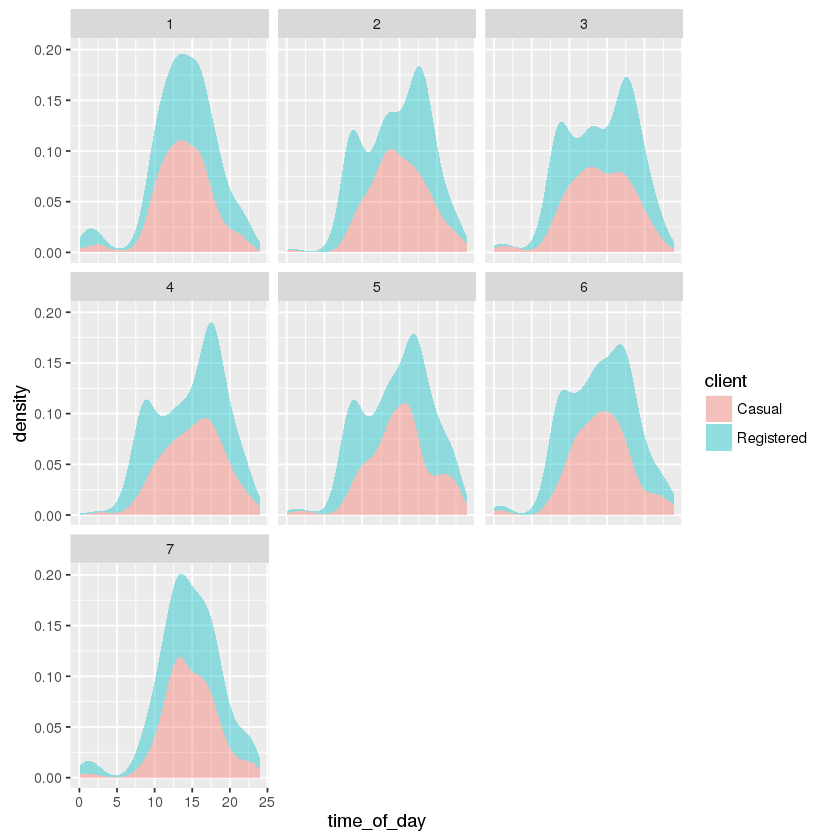

In [24]:
Trips %>% 
    mutate(
        time_of_day = lubridate::hour(sdate) + lubridate::minute(sdate) / 60,
        day_of_week = lubridate::wday(sdate)
    ) %>%
    ggplot(aes(x=time_of_day)) +
        geom_density(aes(fill=client), alpha=0.4, color=NA, position = position_stack()) +
        facet_wrap(~day_of_week)

The last one is better.

### 6.

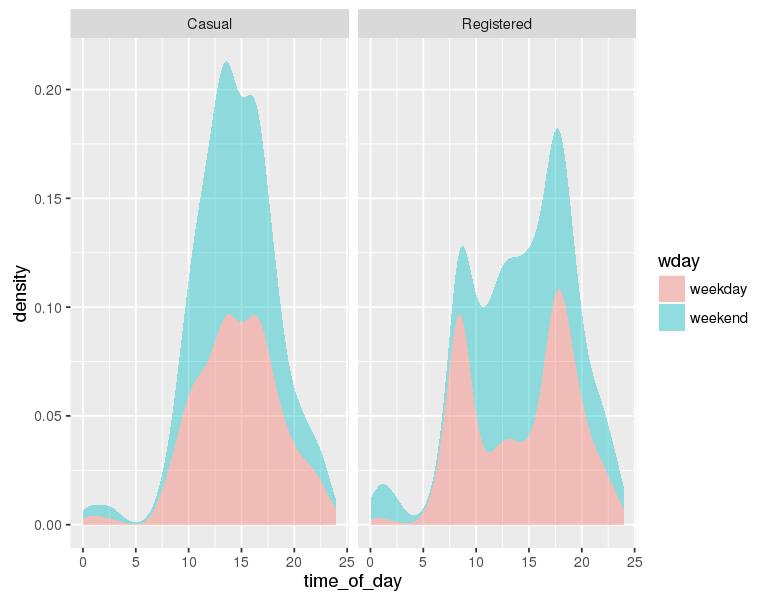

In [29]:
Trips %>% 
    mutate(
        time_of_day = lubridate::hour(sdate) + lubridate::minute(sdate) / 60,
        wday = ifelse(lubridate::wday(sdate) %in% c(1,7), "weekend", "weekday")
    ) %>%
    ggplot(aes(x=time_of_day)) +
        geom_density(aes(fill=client), alpha=0.4, color=NA, position = position_stack()) +
        facet_wrap(~wday)